In [1]:
'''
Read the original data in df_1, df_2, ...
1. Change the directory
2. Run
'''
import pandas as pd
import os
import glob


# Choose the bkg directory
csv_dir = '/Users/yukiharuta/Master/05_UVic/01_Project/04_Perovskite-FCG/04_X-ray-detection/230602_Au-MPB-Ga_polished/230602_tI_Au-MPB-Ga_polished_02-05/bkg'

fig_save_option = True

if fig_save_option:
    figure_dir = csv_dir[:-4] + '/analysis-figure'
    if not os.path.exists(figure_dir):
        os.mkdir(figure_dir)
    
# Store the selected file paths in a list
csv_list = glob.glob(f'{csv_dir}/*.csv')
csv_list.sort()

# Make dataframes with its label df_1, df_2, ...
files = []
df_list = []
for i, file_path in enumerate(csv_list):
    file_name = os.path.basename(file_path)
    files.append(file_name)
    mkdata = f'df_{i+1}= pd.read_csv("{file_path}")'
    mklist = f'df_list.append(df_{i+1})'
    exec(mkdata)
    exec(mklist)
    print('{:02d}: {}'.format(i+1, file_name))

01: 230528-0.2mmh_-12.0V-bkg.csv
02: 230528-0.2mmh_-120.0V-bkg.csv
03: 230528-0.2mmh_-2.4V-bkg.csv
04: 230528-0.2mmh_-24.0V-bkg.csv
05: 230528-0.2mmh_-4.8V-bkg.csv
06: 230528-0.2mmh_-48.0V-bkg.csv
07: 230530-0.5mmh-test_-15.5V_30cm-0.45-3.15mA_4.8-33.6uGys-bkg.csv
08: 230530-0.5mmh_-15.5V-bkg.csv
09: 230530-0.5mmh_-155.0V-bkg.csv
10: 230530-0.5mmh_-3.1V-bkg.csv
11: 230530-0.5mmh_-31.0V-bkg.csv
12: 230530-0.5mmh_-6.2V-bkg.csv
13: 230530-0.5mmh_-62.0V-bkg.csv


/Users/yukiharuta/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Avg:12.9116,Std:0.6534
Avg:22.4181,Std:0.7517
Avg:31.5185,Std:0.8927
Avg:39.1986,Std:1.2405
Avg:44.6682,Std:1.5713


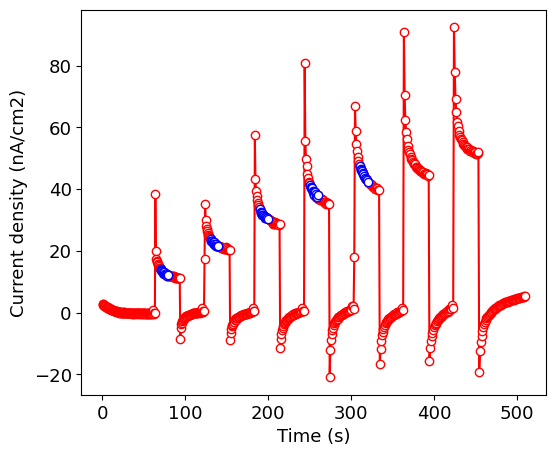

Sensitivity: -1192.95 µC Gy-1 cm-2
R2: 0.9894


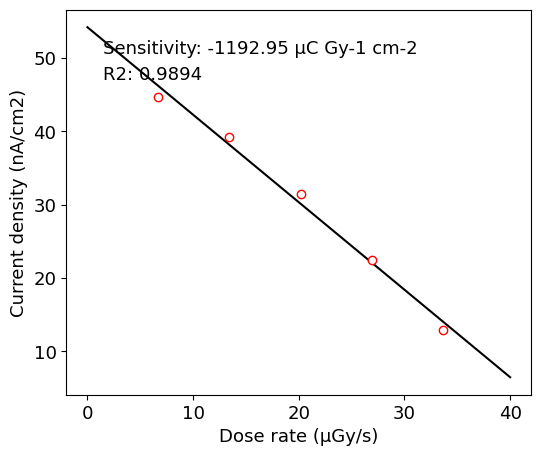

Text(0, 0.5, 'SNR')

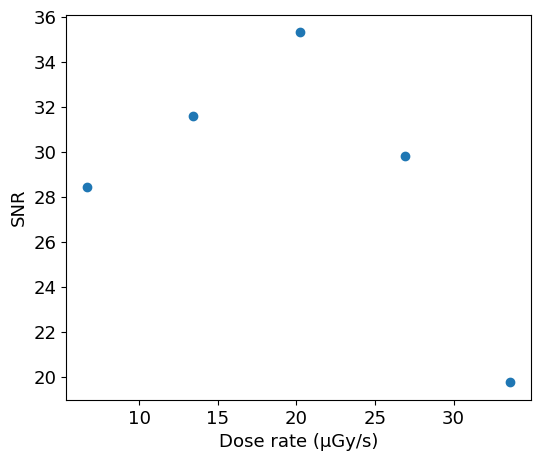

In [2]:
import matplotlib.pyplot as plt
import statistics
import numpy as np
from sklearn.metrics import r2_score

plot_id = 9
df = df_list[plot_id-1]
sample_name = files[plot_id-1][:-8]
X = df['Time (s)'].to_list()
Y = df['J-bkg'].to_list() # nA/cm2

plt.rcParams["font.size"] = 13
fig = plt.figure(figsize=(6, 5))
plt.plot(X,Y,c='red',marker='o',mfc='white')

X_dose = [33.6,26.9,20.2,13.4,6.7] # µGy/s
# X_dose = [10,8,6,4,2] # mGy/s
# X_dose = [n*1000 for n in X_dose] # µGy/s
Y_response = []
Y_SNR = []

# time_offsets = [40,95,150,205,270]
time_offsets = np.linspace(70,310,5) # first ON time, last ON time, number of pulses
duration = 10 # on time, seconds

for time_offset in time_offsets:
    X_range = [time_offset,time_offset+duration]

    X_on, Y_on = [], []
    for x in X:
        if x > X_range[0] and x < X_range[1]:
            X_on.append(x)
            Y_on.append(Y[X.index(x)])

    plt.plot(X_on,Y_on,c='blue',linewidth=3,marker='o',mfc='white')

    mean_value = statistics.mean(Y_on)
    std_dev = statistics.stdev(Y_on)
    
    Y_response.append(mean_value)
    Y_SNR.append(mean_value/std_dev)

    print(f'Avg:{mean_value:.4f},Std:{std_dev:.4f}')

# Response
plt.xlabel('Time (s)')
plt.ylabel('Current density (nA/cm2)')
if fig_save_option:
    fig1 = f'{figure_dir}/{sample_name}_tJ.png'
    plt.savefig(fig1, dpi=900, bbox_inches='tight', transparent=True)
plt.show()

# Sensitivity
X_fit = [0,40]
# X_fit = [0,10050]
a, b = np.polyfit(X_dose,Y_response,1)
Y_fit = [a*n + b for n in X_fit]
r2 = r2_score(Y_response, [a*n + b for n in X_dose])
print(f'Sensitivity: {a*1000:.2f} µC Gy-1 cm-2')
print(f'R2: {r2:.4f}')

plt.rcParams["font.size"] = 13
fig = plt.figure(figsize=(6, 5))
plt.plot(X_fit,Y_fit,c='black')
plt.scatter(X_dose,Y_response,fc='white',ec='red',zorder=2)
plt.xlabel('Dose rate (µGy/s)')
plt.ylabel('Current density (nA/cm2)')
plt.text(0.08, 0.9, f'Sensitivity: {a*1000:.2f} µC Gy-1 cm-2', ha='left', va='center', transform=plt.gca().transAxes)
plt.text(0.08, 0.83, f'R2: {r2:.4f}', ha='left', va='center', transform=plt.gca().transAxes)
if fig_save_option:
    fig2 = f'{figure_dir}/{sample_name}_sensitivity.png'
    plt.savefig(fig2, dpi=900, bbox_inches='tight', transparent=True)
plt.show()

# SNR
plt.rcParams["font.size"] = 13
fig = plt.figure(figsize=(6, 5))
plt.scatter(X_dose,Y_SNR)
plt.xlabel('Dose rate (µGy/s)')
plt.ylabel('SNR')

Avg:1.0254,Std:0.0414
Avg:0.8425,Std:0.0385
Avg:0.6663,Std:0.0367
Avg:0.4818,Std:0.0452
Avg:0.3483,Std:0.0510


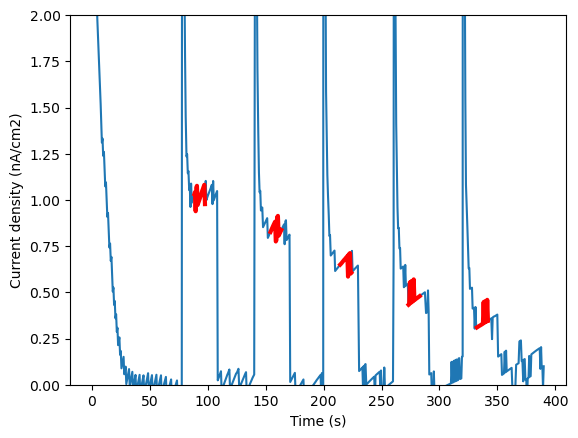

Sensitivity: 2234.50 µC Gy-1 cm-2


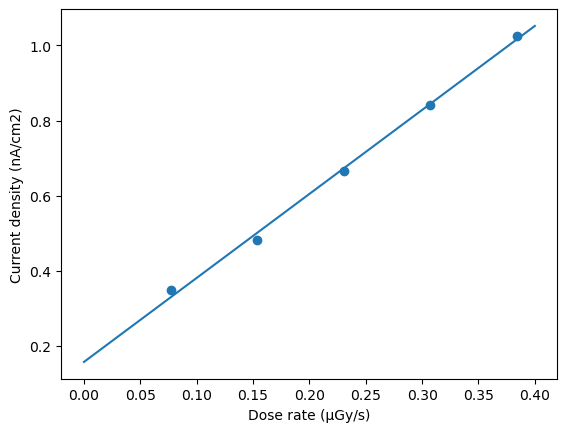

LoD: 11.2 nGy/s


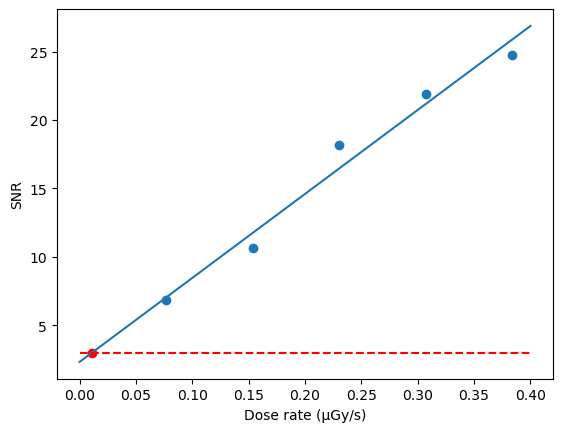

In [10]:
import matplotlib.pyplot as plt
import statistics
import numpy as np

plot_id = 2
df = df_list[plot_id-1]
X = df['Time (s)'].to_list()
Y = df['J-bkg'].to_list() # nA/cm2
plt.plot(X,Y)

X_dose = [0.384,0.30725,0.2305,0.15375,0.077]
Y_response = []
Y_SNR = []

time_offsets = [88,154,214,273,332]
duration = 10

for time_offset in time_offsets:
    X_range = [time_offset,time_offset+duration]

    X_on, Y_on = [], []
    for x in X:
        if x > X_range[0] and x < X_range[1]:
            X_on.append(x)
            Y_on.append(Y[X.index(x)])

    plt.plot(X_on,Y_on,c='red',linewidth=3)

    mean_value = statistics.mean(Y_on)
    std_dev = statistics.stdev(Y_on)
    
    Y_response.append(mean_value)
    Y_SNR.append(mean_value/std_dev)

    print(f'Avg:{mean_value:.4f},Std:{std_dev:.4f}')
    
plt.xlabel('Time (s)')
plt.ylabel('Current density (nA/cm2)')
plt.ylim(0,2)
plt.show()

X_fit = [0,0.4]
a, b = np.polyfit(X_dose,Y_response,1)
Y_fit = [a*n + b for n in X_fit]
print(f'Sensitivity: {a*1000:.2f} µC Gy-1 cm-2')
plt.scatter(X_dose,Y_response)
plt.plot(X_fit,Y_fit)
plt.xlabel('Dose rate (µGy/s)')
plt.ylabel('Current density (nA/cm2)')
plt.show()

# SNR
a, b = np.polyfit(X_dose,Y_SNR,1)
Y_fit = [a*n + b for n in X_fit]
plt.scatter(X_dose,Y_SNR)
plt.plot(X_fit,Y_fit)
plt.xlabel('Dose rate (µGy/s)')
plt.ylabel('SNR')
plt.plot(X_fit,[3,3],c='red',linestyle='dashed')
LoD = (3 - b) / a # intercept when SNR = 3
print(f'LoD: {LoD*1000:.1f} nGy/s') 
plt.scatter([LoD],[3],c='red')
plt.show()